<head><link rel="stylesheet" href="../../../cssthemes/github.css"><meta name="viewport" content="initial-scale=1, width=device-width"></head>

In [12]:
import sysprint(sys.executable)from IPython.core.interactiveshell import InteractiveShellInteractiveShell.ast_node_interactivity = "all"InteractiveShell.colors = "Linux"InteractiveShell.separate_in = 0import pandas as pdimport matplotlib.pyplot as pltimport numpy as npfrom matplotlib import stylestyle.use('fivethirtyeight')import os, sys

/home/jcmint/anaconda3/envs/learningenv/bin/python


# Data VisualizationSimplifies data interpretation.**Conceptual or data-driven**For example, a theoretical plot - supply & demand, stress & strain.**Declarative or Exploratory**Presentation of real-world data to reach a final conclusion.Exploratory is just for quick analysis rather than polishing the visualization itself.**Principles of Good Design*** Trustworthy* Evidence for a figure should be in the data. E.g. zooming in on an axis to exaggerate a change in a value is not trustworthy.* Accessible* Make visuals appropriate for audience, and to fulfill its intended purpose* Elegant

## Visualization libraries - MatplotlibMatplotlib is the main go-to for day to day visualization; others have specialization for specific use cases.Common components include a chart type, axes ranges and labels, figure labels, legend, aesthetics and annotations.* Using [the Indicators](https://www.kaggle.com/worldbank/world-development-indicators/version/2#Indicators.csv) data set.

In [2]:
indicators = pd.read_csv('../../../../data/w5vis/Indicators.csv')# no need to run often, so separate into its own code cell.

In [3]:
# print head of dataframeindicators.head()# unique country namescountries = indicators['CountryName'].unique().tolist()print("country num:", len(countries))# number of country codescocodes = indicators['CountryCode'].unique().tolist()print("country codes:", len(cocodes))# how many indicators?inds = indicators['IndicatorName'].unique().tolist()print("indicators:", len(inds))# years and range of datayears = indicators['Year'].unique().tolist()print(len(years), min(years), "to", max(years))

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


country num: 247
country codes: 247
indicators: 1344
56 1960 to 2015


This is actually a 4D dataset, with country, indicator, year and value. I would say its combination of the first three that match each value.

In [4]:
# pick a random indicator for a random countryhist_indicator = 'Population in the largest city'hist_country = 'MEX'# grab datadata = indicators[indicators['IndicatorName'].str.contains(hist_indicator) & indicators['CountryCode'].str.contains(hist_country)]data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15382,Mexico,MEX,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,1960,28.280377
40837,Mexico,MEX,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,1961,28.287121
68643,Mexico,MEX,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,1962,28.305114
97213,Mexico,MEX,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,1963,28.334391
126125,Mexico,MEX,Population in the largest city (% of urban pop...,EN.URB.LCTY.UR.ZS,1964,28.378130


## Bar Plot

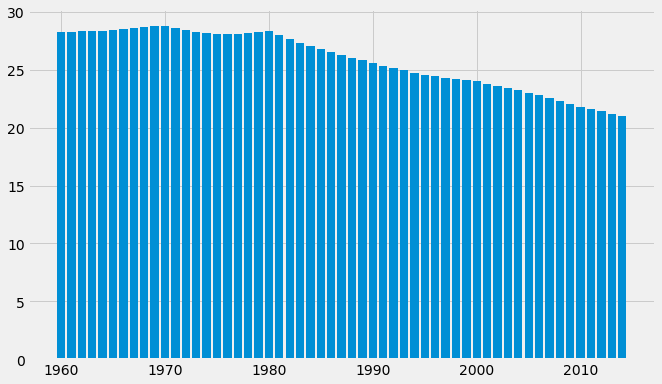

In [13]:
fig, axis = plt.subplots()fig.set_size_inches(10, 6)plt.bar(data['Year'].values, data['Value'].values)plt.show();

## Line Plot

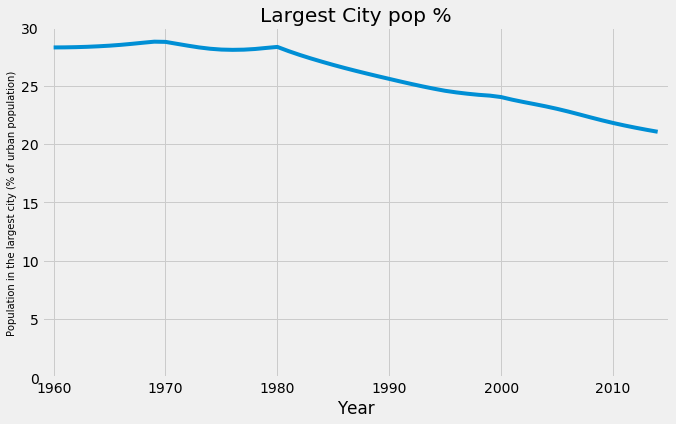

In [14]:
fig, axis = plt.subplots()fig.set_size_inches(10, 6)plt.plot(data['Year'].values, data['Value'].values)plt.xlabel('Year')plt.ylabel(data['IndicatorName'].iloc[0], fontsize=10)plt.title('Largest City pop %')plt.axis([1959, 2015,0,30])plt.show();

## Histogram

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534383,Arab World,ARB,GDP per person employed (constant 1990 PPP $),SL.GDP.PCAP.EM.KD,2014,16767.221871
5534893,Central Europe and the Baltics,CEB,GDP per person employed (constant 1990 PPP $),SL.GDP.PCAP.EM.KD,2014,25167.333899
5535240,East Asia & Pacific (all income levels),EAS,GDP per person employed (constant 1990 PPP $),SL.GDP.PCAP.EM.KD,2014,18639.269885
5535541,East Asia & Pacific (developing only),EAP,GDP per person employed (constant 1990 PPP $),SL.GDP.PCAP.EM.KD,2014,15755.489075
5536004,Euro area,EMU,GDP per person employed (constant 1990 PPP $),SL.GDP.PCAP.EM.KD,2014,45073.794771


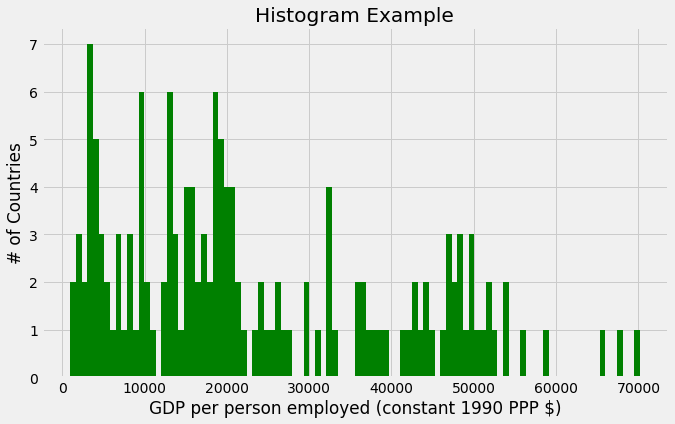

In [15]:
# Prep data for histogramimport recond_gdp_worker_ppp = indicators['IndicatorName'] == 'GDP per person employed (constant 1990 PPP $)'cond_2014 = indicators['Year'] == 2014data_2 = indicators[cond_gdp_worker_ppp & cond_2014]display(data_2.head())# add a semicolon to last plt in a cell to avoid printing extra infofig, axis = plt.subplots()fig.set_size_inches(10, 6)plt.hist(data_2['Value'].values, 100, density=False, facecolor='green');plt.xlabel(data_2['IndicatorName'].iloc[0]);plt.ylabel('# of Countries');plt.title('Histogram Example');

## Scatterplot#### Data Prep for ScatterplotNow, plot GDP per worker vs percent urbanization for all countries for all years of data* No need to aggregate - just use the 'World' CountryName* 2 Filters:* GDP per worker, GDP per person employed (constant 1990 PPP $)* percent urbanization, Urban population (% of total)* Only pull year and value - other columns aren't needed* Inner join tables on Year. Merge seems to automatically drop missing years where the first dataframe had no values* Plot urbanization on x, gdp per person on y

In [8]:
cond_world = indicators['CountryName'] == 'World'gdp_worker_ppp = indicators[cond_gdp_worker_ppp & cond_world][['Year', 'Value']]cond_3 = indicators['IndicatorName'] == 'Urban population (% of total)'urban_perc = indicators[cond_3 & cond_world][['Year', 'Value']]data_3 = urban_perc.merge(gdp_worker_ppp, on = 'Year', how = 'inner')display(gdp_worker_ppp.head(), urban_perc.head(), data_3.head())len(gdp_worker_ppp), len(urban_perc), len(data_3)

,Year,Value
2012906,1991,12056.692883
2129349,1992,12144.729023
2251054,1993,12242.591709
2374887,1994,12430.524713
2501760,1995,12767.091788


,Year,Value
3491,1960,33.557608
27221,1961,34.073235
54067,1962,34.517820
82472,1963,34.908136
111146,1964,35.303686


,Year,Value_x,Value_y
0,1991,43.285793,12056.692883
1,1992,43.624850,12144.729023
2,1993,43.982123,12242.591709
3,1994,44.334518,12430.524713
4,1995,44.703049,12767.091788


(24, 55, 24)

#### Scatterplot generation

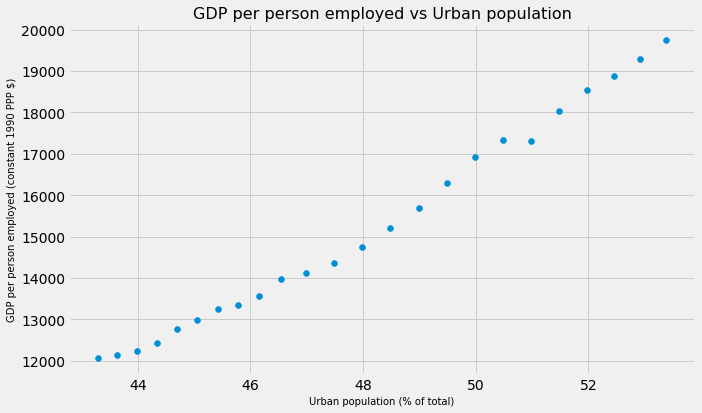

In [17]:
fig, axis = plt.subplots()# Grid lines, Xticks, Xlabel, Ylabelaxis.yaxis.grid(True)axis.set_title('GDP per person employed vs Urban population',fontsize=16)axis.set_xlabel('Urban population (% of total)',fontsize=10)axis.set_ylabel('GDP per person employed (constant 1990 PPP $)',fontsize=10)fig.set_size_inches(10, 6)X = data_3['Value_x']Y = data_3['Value_y']axis.scatter(X, Y)plt.show();

#### What is the correlation?

In [10]:
np.corrcoef(X, Y)

array([[1.        , 0.99437166],
       [0.99437166, 1.        ]])

The correlation is extremely strong.## BoxplotCompare distributions of life expectancy in 1960 vs 2013

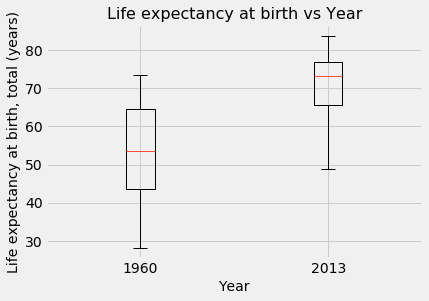

In [18]:
cond_2013, cond_1960 = indicators['Year'] == 2013, indicators['Year'] == 1960cond_life_exp = indicators['IndicatorName'] == 'Life expectancy at birth, total (years)'life_exp_1960 = indicators[cond_1960 & cond_life_exp]['Value']life_exp_2013 = indicators[cond_2013 & cond_life_exp]['Value']life_exp_data = [life_exp_1960, life_exp_2013]fig, axes = plt.subplots()axis.yaxis.grid(True)bplot = axes.boxplot(life_exp_data,vert=True)     # vertical aligmnentplt.xticks([1, 2], ['1960', '2013'])axes.set_title('Life expectancy at birth vs Year',fontsize=16)axes.set_xlabel('Year',fontsize=14)axes.set_ylabel('Life expectancy at birth, total (years)',fontsize=14)plt.show();

The distribution has tightened somewhat.